In [2]:
import os, sys
sys.path = [os.path.abspath("../../")] + sys.path
from learning4e import *
from notebook4e import *

## DECISION TREE LEARNER

### Overview

#### Decision Trees
A decision tree is a flowchart that uses a tree of decisions and their possible consequences for classification. At each non-leaf node of the tree an attribute of the input is tested, based on which corresponding branch leading to a child-node is selected. At the leaf node the input is classified based on the class label of this leaf node. The paths from root to leaves represent classification rules based on which leaf nodes are assigned class labels.
![perceptron](images/decisiontree_fruit.jpg)
#### Decision Tree Learning
Decision tree learning is the construction of a decision tree from class-labeled training data. The data is expected to be a tuple in which each record of the tuple is an attribute used for classification. The decision tree is built top-down, by choosing a variable at each step that best splits the set of items. There are different metrics for measuring the "best split". These generally measure the homogeneity of the target variable within the subsets.

#### Gini Impurity
Gini impurity of a set is the probability of a randomly chosen element to be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.

$$I_G(p) = \sum{p_i(1 - p_i)} = 1 - \sum{p_i^2}$$

We select a split which minimizes the Gini impurity in child nodes.

#### Information Gain
Information gain is based on the concept of entropy from information theory. Entropy is defined as:

$$H(p) = -\sum{p_i \log_2{p_i}}$$

Information Gain is difference between entropy of the parent and weighted sum of entropy of children. The feature used for splitting is the one which provides the most information gain.

#### Pseudocode

You can view the pseudocode by running the cell below:

In [ ]:
pseudocode("Decision Tree Learning")

### Implementation
The nodes of the tree constructed by our learning algorithm are stored using either `DecisionFork` or `DecisionLeaf` based on whether they are a parent node or a leaf node respectively.

In [ ]:
psource(DecisionFork)

DecisionFork holds the attribute, which is tested at that node, and a dict of branches. The branches store the child nodes, one for each of the attribute's values. Calling an object of this class as a function with input tuple as an argument returns the next node in the classification path based on the result of the attribute test.

In [ ]:
psource(DecisionTreeLearner)

The implementation of DecisionTreeLearner provided in learning.py uses information gain as the metric for selecting which attribute to test for splitting. The function builds the tree top-down in a recursive manner. Based on the input it makes one of the four choices:

<ol>
<li>If the input at the current step has no training data we return the mode of classes of input data received in the parent step (previous level of recursion).</li>
<li>If all values in training data belong to the same class it returns a `DecisionLeaf` whose class label is the class which all the data belongs to.</li>
<li>If the data has no attributes that can be tested we return the class with highest plurality value in the training data.</li>
<li>We choose the attribute which gives the highest amount of entropy gain and return a `DecisionFork` which splits based on this attribute. Each branch recursively calls `decision_tree_learning` to construct the sub-tree.</li>
</ol>

### Example

Here we will apply the Decision Tree Learner to classify our previous example datasets. `DecisionTreeLearner` only takes a `DataSet` object as input and will automatically learn the attributes and targets of data. The learner function will return a `DecisionFork` object which can be use to predict further data example.

Decision Tree can be used to simulate the process of human making a decision. It can be applied to either binary or multiple classification. For many complex problems like digit image classification, decision tree can yeild very good results. Thus it can be the first algorithm to in order to investigate a dataset at the beginning of a project.

#### Iris Example

Let's try on the algorithm on iris example as it has less attributes which makes it clearer to demonstrate. 
The first step is to load dataset to decision tree learner

In [4]:
iris = DataSet(name="iris")

DTL = DecisionTreeLearner(iris)

Then you can try a new example on the trained learner:

In [5]:
print(DTL([5.1, 3.0, 1.1, 0.1]))

setosa


As expected, the Decision Tree learner classifies the sample as "setosa" as seen in the previous section.

#### Restaurant Example

Now let's try the decision tree algorithm on Figure 18.3 example

In [18]:
restaurant = DataSet(name="restaurant", attrnames='Alternate Bar Fri/Sat Hungry Patrons Price ' +
                   'Raining Reservation Type WaitEstimate Wait')
RT = DecisionTreeLearner(restaurant)

If we try to print the object, we can see the trained decision tree in the from of nested decision forks:

In [19]:
print(RT)

DecisionFork(4, 'Patrons', {'Full': DecisionFork(9, 'WaitEstimate', {'10-30': DecisionFork(8, 'Type', {'Italian': 'No', 'French': 'No', 'Burger': 'Yes', 'Thai': 'Yes'}), '>60': 'No', '0-10': 'No', '30-60': DecisionFork(8, 'Type', {'Italian': 'No', 'French': 'Yes', 'Burger': 'Yes', 'Thai': 'No'})}), 'None': 'No', 'Some': 'Yes'})


Now let's try a new example according to the attribute names:

In [22]:
print(restaurant.attrnames)

['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining', 'Reservation', 'Type', 'WaitEstimate', 'Wait']


Let's try some Thai food with full patron and waiting time between 10 and 30 minites:

In [36]:
example = ['Yes', 'No', 'Yes', 'Yes', 'Full', '$', 'No', 'No', 'Thai', '10-30', 'Yes']
print(RT(example))

Yes


If we want to try some else like French:

In [37]:
example = ['Yes', 'No', 'Yes', 'Yes', 'Full', '$', 'No', 'No', 'French', '10-30', 'Yes']
print(RT(example))

No


## Random Forest


### Overview

![random_forest.png](images/random_forest.png)   
Image via [src](https://cdn-images-1.medium.com/max/800/0*tG-IWcxL1jg7RkT0.png)

#### Random Forest

As the name of the algorithm and image above suggest, this algorithm creates the forest with a number of trees. The more number of trees makes the forest robust. In the same way in random forest algorithm, the higher the number of trees in the forest, the higher is the accuray result. The main difference between Random Forest and Decision trees is that, finding the root node and splitting the feature nodes will be random.  

Let's see how Rnadom Forest Algorithm work :   
Random Forest Algorithm works in two steps, first is the creation of random forest and then the prediction. Let's first see the creation :  

The first step in creation is to randomly select 'm' features out of total 'n' features. From these 'm' features calculate the node d using the best split point and then split the node into further nodes using best split. Repeat these steps until 'i' number of nodes are reached. Repeat the entire whole process to build the forest.  

Now, let's see how the prediction works
Take the test features and predict the outcome for each randomly created decision tree. Calculate the votes for each prediction and the prediction which gets the highest votes would be the final prediction.


### Implementation

Below mentioned is the implementation of Random Forest Algorithm.

In [ ]:
psource(RandomForest)

This algorithm creates an ensemble of decision trees using bagging and feature bagging. It takes 'm' examples randomly from the total number of examples and then perform feature bagging with probability p to retain an attribute. All the predictors are predicted from the DecisionTreeLearner and then a final prediction is made.

### MNIST Example

First let's load MNIST data to a `DataSet` object with predefined load function:

In [68]:
train_img, train_lbl, test_img, test_lbl = load_MNIST(path="../../aima-data/MNIST/Digits")

In order to use `load_MNIST` correctly, you need to input the correct data directory of MNIST data. Then we compose the training data and labels to a full example.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
examples = [np.append(train_img[i], train_lbl[i]) for i in range(len(train_img))]
print(len(examples))

60000


We have 60000 examples in total, we use the first 100 examples to roughly train the model:

In [80]:
MNIST_dataset = DataSet(examples=examples[:100])
MNIST_RF = RandomForest(MNIST_dataset)

Let's try a example in the dataset:

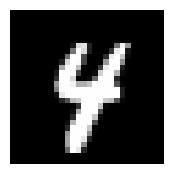

In [100]:
plt.figure(figsize=(2,2))
plt.imshow(test_img[-3].reshape((28, 28)))
plt.axis("off")
plt.show()

The prediction of our random forest model is as following:

In [101]:
print(MNIST_RF(test_img[-3]))

[4, 4, 4, 1, 9]
4


Which is the same as our own perception of the figure.

# Decision List Learner

Decision list is an algorithm that applys PAC learning to a new hypothesis space. PAC is short for probably approximately correct which means any hypothesis that is consistent with a sufﬁciently large set of training examples is unlikely to be seriously wrong. 